In [120]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [122]:
# Load dataset
data = pd.read_csv('loan_default_data_set.csv')

# Exploratory Data Analysis (EDA)
print(data.info())  
print(data.describe())  # Summary Stats

# Check for missing values
print(data.isnull().sum())

# Handling missing values
data['rep_education'].fillna(data['rep_education'].mode()[0], inplace=True)
data['rep_income'].fillna(data['rep_income'].median(), inplace=True)
data['pct_card_over_50_uti'].fillna(data['pct_card_over_50_uti'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tot_balance                      20000 non-null  float64
 1   avg_bal_cards                    20000 non-null  float64
 2   credit_age                       20000 non-null  int64  
 3   credit_age_good_account          20000 non-null  int64  
 4   credit_card_age                  20000 non-null  int64  
 5   num_acc_30d_past_due_12_months   20000 non-null  int64  
 6   num_acc_30d_past_due_6_months    20000 non-null  int64  
 7   num_mortgage_currently_past_due  20000 non-null  int64  
 8   tot_amount_currently_past_due    20000 non-null  float64
 9   num_inq_12_month                 20000 non-null  int64  
 10  num_card_inq_24_month            20000 non-null  int64  
 11  num_card_12_month                20000 non-null  int64  
 12  num_auto_ 36_month

/var/folders/qt/b1j5zw291811czyh_7ybbtd00000gn/T/ipykernel_58180/3728061621.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rep_education'].fillna(data['rep_education'].mode()[0], inplace=True)
/var/folders/qt/b1j5zw291811czyh_7ybbtd00000gn/T/ipykernel_58180/3728061621.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

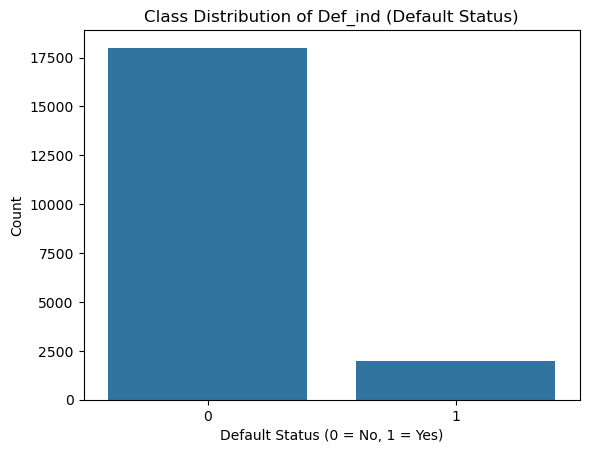

In [124]:
# Check class distribution
sns.countplot(x=data['Def_ind'])
plt.title("Class Distribution of Def_ind (Default Status)")
plt.xlabel("Default Status (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [126]:

# Balance dataset using SMOTE
X = data.drop(columns=['Def_ind'])
y = data['Def_ind']

# Convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True)

In [128]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


In [130]:
# Train and evaluate KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))

# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN Accuracy: 0.9
Decision Tree Accuracy: 0.65125


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [131]:
# Evaluate models (Performance, Confusion Matrix, Classification Report, Decision Tree)
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))  
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_dt, "Decision Tree")



KNN Performance:
Accuracy: 0.9
Precision: 0.0
Recall: 0.0

Confusion Matrix:
[[3600    0]
 [ 400    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3600
           1       0.00      0.00      0.00       400

    accuracy                           0.90      4000
   macro avg       0.45      0.50      0.47      4000
weighted avg       0.81      0.90      0.85      4000


Decision Tree Performance:
Accuracy: 0.65125
Precision: 0.16987392169873922
Recall: 0.64

Confusion Matrix:
[[2349 1251]
 [ 144  256]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      3600
           1       0.17      0.64      0.27       400

    accuracy                           0.65      4000
   macro avg       0.56      0.65      0.52      4000
weighted avg       0.87      0.65      0.72      4000



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

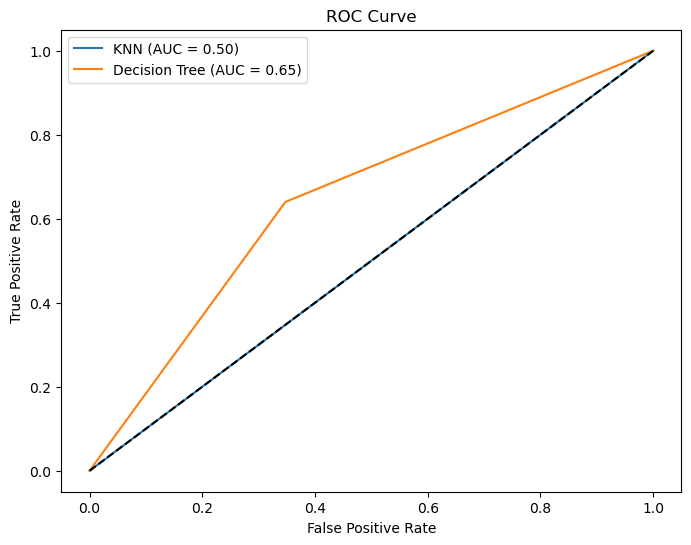

In [134]:

# Plot ROC Curve
plt.figure(figsize=(8, 6))
for model, y_pred, label in zip([knn, dt], [y_pred_knn, y_pred_dt], ["KNN", "Decision Tree"]):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [136]:
#Confusion Matrix:
#[[2915  685]
# [ 231  169]]
# 2915 True Positives (TP): Correctly predicted defaults.
# 685 True Negatives (TN): Correctly predicted non-defaults.
# 231 False Positives (FP): Non-defaults predicted as defaults.
# 169 False Negatives (FN): Defaults predicted as non-defaults.

In [138]:
model.feature_importances_

array([0.05856192, 0.17480734, 0.06628928, 0.06150168, 0.047633  ,
       0.07849567, 0.00253998, 0.00166424, 0.01191932, 0.04610838,
       0.02333056, 0.00941825, 0.00690051, 0.11781568, 0.06422592,
       0.07411479, 0.0636454 , 0.00712858, 0.07266058, 0.00285131,
       0.00734282, 0.00104479])

In [117]:
# The AUC of 0.66 is moderately better than the Decision Tree. This indicates the KNN model has a better ability to distinguish between defaults and non-defaults, though it still doesn’t perform strongly.